# Задание 3. 
Найти все собственные числа матрицы методом Якоби (задание – 13.8 (п. 1), варианты – 13.9).

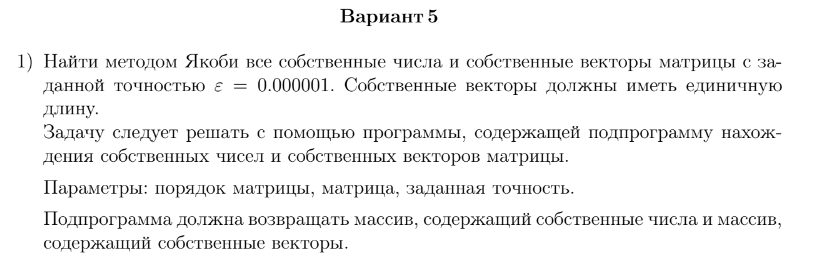

Вариант матрицы (13.9) - 5

In [2]:
import numpy as np
import math
import copy

# A = np.array([[-1.14896, -0.53716, 0.78959],
#               [-0.53716, 0.88917, 0.19536],
#               [0.78959, 0.19536, -1.28186]])

A = np.array([[-0.81417, -0.01937, 0.41372],
              [-0.01937, 0.54414, 0.00590],
              [0.41372, 0.00590, -0.81445]])

n, m = A.shape
e = 10**(-6)

w, v = np.linalg.eig (A)

# выбираем среди наддиагональных элементов максимальный по абсолютной величине
def maxupperdiag(B):
  maxd = B[0][1]
  n = len(B)
  max_i = 0
  max_j = 1
  for i in range(n):
    for j in range(i, n):
      if abs(B[i][j]) > maxd and i != j:
        maxd = B[i][j]
        max_i = i
        max_j = j
  return maxd, max_i, max_j

x, ii, jj = maxupperdiag(A)
k = 0

# готовим единичную матрицу для собственных векторов
X = np.eye(n)

while x > e:

  # вычисление значений c = cos(\varphi_k) и s = sin(\varphi_k)
  d = math.sqrt((A[ii, ii] - A[jj, jj])**2 + 4*A[ii, jj]**2)
  s = np.sign( A[ii, jj] * (A[ii,ii] - A[jj,jj])) * math.sqrt(1/2*(1 - abs(A[ii,ii] - A[jj,jj]) / d))
  c = math.sqrt(1/2*(1 + abs(A[ii, ii] - A[jj, jj] ) / d))
  
  # делаем матрицу собственных векторов
  V = np.eye(n)
  V[ii,ii], V[jj,jj], V[ii , jj], V[jj, ii] = c, c, -s, s
  X = X.dot(V)

  # пересчитываем элементы матрицы А^(k+1)
  AA = copy.deepcopy(A)
  
  AA[ii][ii] = (c**2)*A[ii][ii] + 2*c*s*A[ii][jj] + (s**2)*A[jj][jj]
  AA[jj][jj] = (s**2)*A[ii][ii] - 2*c*s*A[ii][jj] + (c**2)*A[jj][jj]
  AA[ii][jj] = (c**2 - s**2)*A[ii][jj] + c*s*(A[jj][jj] - A[ii][ii])
  AA[jj][ii] = AA[ii][jj]
  
  for i in range(n):
    for j in range(m):
      if i != ii and i != jj and j != ii and j != jj:
        AA[i][j] = A[i][j]
      elif i != ii and i != jj:
        AA[i][ii] = c*A[i][ii] + s*A[i][jj]
        AA[i][jj] = -s*A[i][ii] + c*A[i][jj]
        
  A = copy.deepcopy(AA)
  k += 1
  
  x, ii, jj = maxupperdiag(A)

lamb = np.diag(A)
lamb = np.roll(lamb, 1)

print("Собственные числа, полученные методом Якоби: ", lamb)
print("\nСобственные векторы, полученные методом Якоби: \n", X)
print("\nПотребовалось количество итераций: ", k)
print("\nТочные значения для собственных чисел: ", w)
print("\nАбсолютная фактическая погрешность: ", abs(lamb - w))

Собственные числа, полученные методом Якоби:  [-1.22821019 -0.40058993  0.54432012]

Собственные векторы, полученные методом Якоби: 
 [[ 7.07059602e-01 -7.12763789e-03 -7.07118035e-01]
 [-2.37824984e-06  9.99949178e-01 -1.00817075e-02]
 [ 7.07153957e-01  7.13004982e-03  7.07023651e-01]]

Потребовалось количество итераций:  4

Точные значения для собственных чисел:  [-1.22821015 -0.40068602  0.54441617]

Абсолютная фактическая погрешность:  [3.49231262e-08 9.60859624e-05 9.60510393e-05]


*Работу выполнил Пашов Павел, группа 323.*